In [ ]:
getwd()

list.files()

[1] "/Users/maddi/Documents/secure_genomics_pipeline/notebooks"

[1] "01_exploratory_analysis.ipynb" "02_stats_and_DE.ipynb"        
[3] "03_pca_analysis.ipynb"         "04_security_demo.ipynb"

character(0)

In [5]:
list.files("data")
list.files("data/processed")

character(0)

character(0)

In [15]:
setwd("/Users/maddi/Documents/secure_genomics_pipeline")
getwd()
list.files()

[1] "/Users/maddi/Documents/secure_genomics_pipeline"

[1] "data"                     "notebooks"               
[3] "README.md"                "requirements.txt"        
[5] "results"                  "secure-genomics-pipeline"
[7] "src"

In [18]:
data <- read.csv(
    "data/processed/log2_expression.csv", 
    row.names = 1, 
    check.names = FALSE
    )
# Transpose so rows are samples and columns are genes
data_t <- t(data)

Scaling is disabled because the data had already been log-transformed and standardized during Python preprocessing, preventing redundant normalization

In [19]:
pca <- prcomp(data_t, scale. = FALSE)
summary(pca)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     28.5795 23.0033 20.1358 6.40825 4.83579 3.70105 3.30057
Proportion of Variance  0.4438  0.2875  0.2203 0.02231 0.01271 0.00744 0.00592
Cumulative Proportion   0.4438  0.7313  0.9516 0.97393 0.98664 0.99408 1.00000
                             PC8
Standard deviation     3.971e-14
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

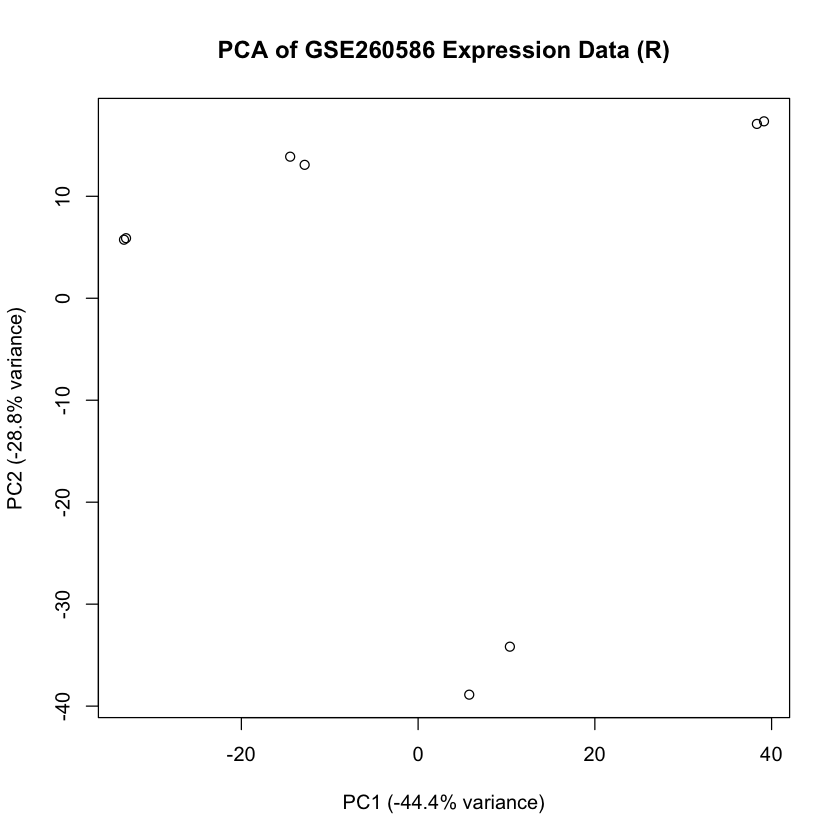

In [23]:
# PCA visualization
var_explained <-- round(100 * (pca$sdev^2 / sum(pca$sdev^2)), 1)

plot(
    pca$x[,1], pca$x[,2],
    xlab = paste0("PC1 (", var_explained[1], "% variance)"),
    ylab = paste0("PC2 (", var_explained[2], "% variance)"),
    main = "PCA of GSE260586 Expression Data (R)"
)